In [23]:
import pandas as pan;
import numpy as np;
import matplotlib.pyplot as plotter;
import seaborn as sns;
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [2]:
matrix_data = pan.read_csv("hearing_test.csv")

In [3]:
matrix_data.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
matrix_data.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<Axes: xlabel='test_result', ylabel='count'>

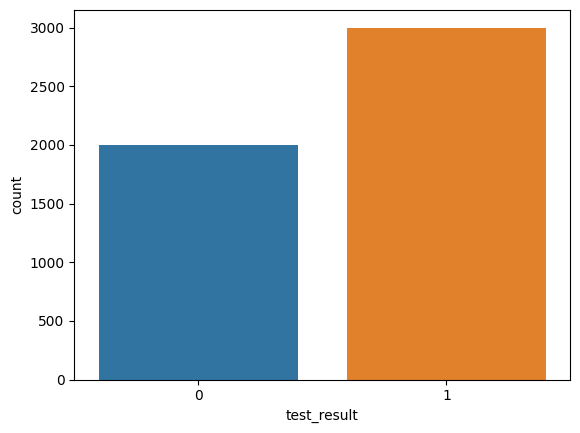

In [5]:
sns.countplot(x = matrix_data["test_result"])

<Axes: xlabel='test_result', ylabel='physical_score'>

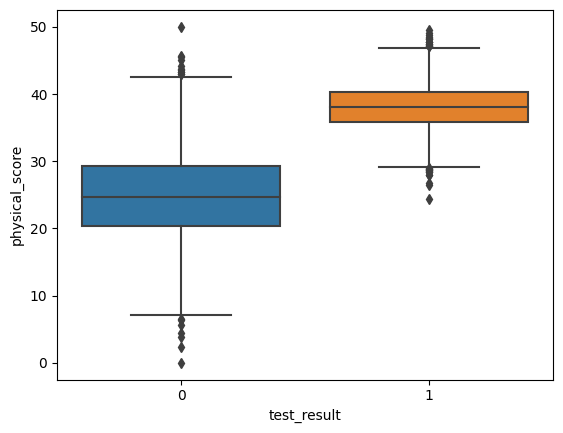

In [7]:
sns.boxplot(y = matrix_data["physical_score"], x = matrix_data["test_result"])

<Axes: xlabel='age', ylabel='physical_score'>

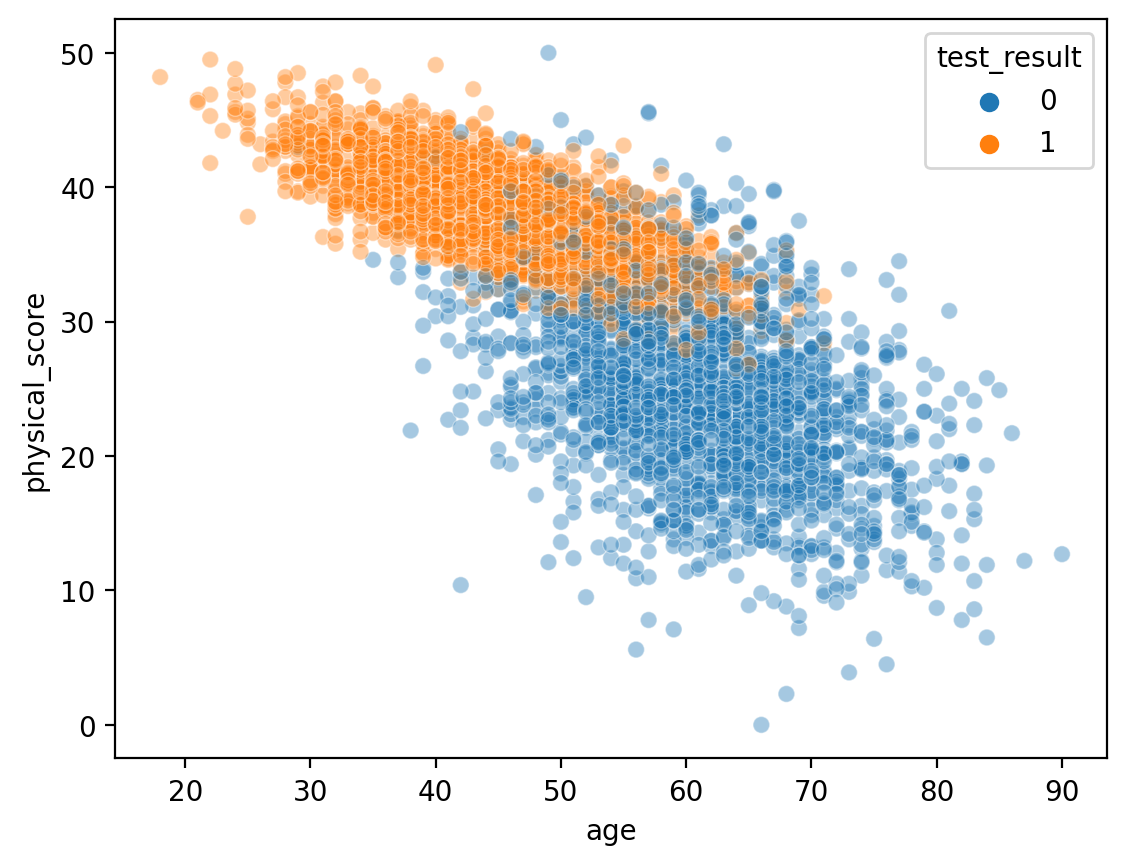

In [14]:
plotter.figure(dpi = 200)
sns.scatterplot(x = matrix_data["age"], y = matrix_data["physical_score"], hue = matrix_data["test_result"], alpha = 0.4)

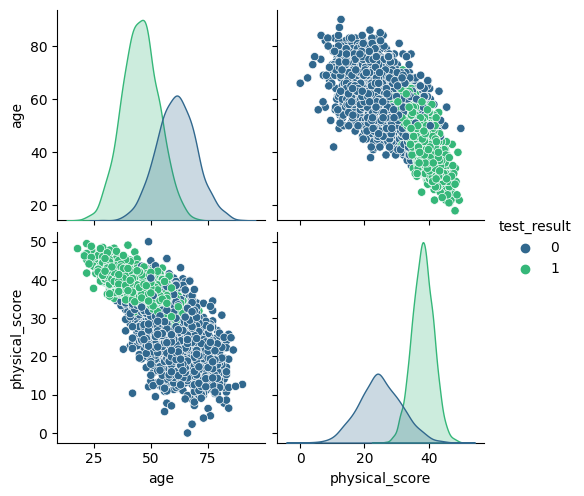

In [16]:
sns.pairplot(data = matrix_data, hue = "test_result", palette = "viridis")

<Axes: >

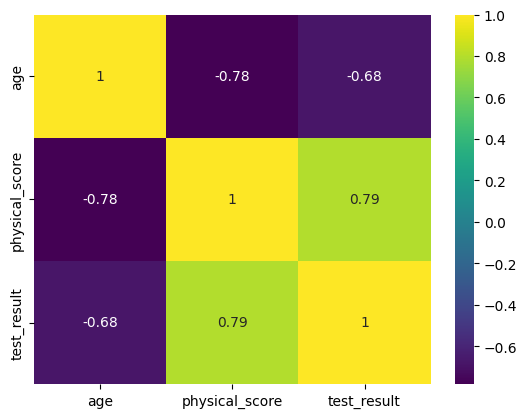

In [18]:
sns.heatmap(matrix_data.corr(numeric_only = True), annot = True, cmap = 'viridis')

In [21]:
#the model
features = matrix_data.drop("test_result", axis  = 1)
label = matrix_data["test_result"]
#have to do train ,val, test split first, and then cross val?
scaler = StandardScaler()
feature_train, feature_test, label_train, label_test = train_test_split(features, label, random_state = 42, test_size = 0.1)
scaler.fit(feature_train)
feature_train = scaler.transform(feature_train)
feature_test = scaler.transform(feature_test)

In [25]:
log_learner = LogisticRegression()
log_learner.fit(feature_train, label_train)

LogisticRegression()

In [26]:
pred = log_learner.predict(feature_test)

array([[-0.91841476,  3.52854047]])

In [ ]:
#perf metrics for classification
#confusion metrics
